In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
data <- read.csv("cities_r2.csv.xls")

In [4]:
str(data)

'data.frame':	493 obs. of  22 variables:
 $ name_of_city                  : Factor w/ 492 levels "Abohar ","Achalpur ",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ state_code                    : int  3 27 28 20 28 16 9 24 27 15 ...
 $ state_name                    : Factor w/ 29 levels "ANDAMAN & NICOBAR ISLANDS",..: 23 15 2 11 2 26 27 7 15 18 ...
 $ dist_code                     : int  9 7 1 24 21 1 15 7 26 3 ...
 $ population_total              : int  145238 112293 117388 173988 166537 399688 1574542 5570585 350905 291822 ...
 $ population_male               : int  76840 58256 59232 91495 82743 199616 849771 2935869 179755 143803 ...
 $ population_female             : int  68398 54037 58156 82493 83794 200072 724771 2634716 171150 148019 ...
 $ X0.6_population_total         : int  15870 11810 13103 23042 18406 33635 186516 589076 36712 35147 ...
 $ X0.6_population_male          : int  8587 6186 6731 12063 9355 17341 105279 317917 19748 17667 ...
 $ X0.6_population_female        : int  7283 5624 

In [5]:
library(ggplot2) 
library(readr) 
library(tidyr)
library(dplyr)
library(stringr)
library(reshape2)
library(scales)
library(corrplot)


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



ERROR: Error in library(corrplot): there is no package called ‘corrplot’


In [6]:
data$lat <- sapply(strsplit(as.character(data$location),','), "[", 1)
data$lon <- sapply(strsplit(as.character(data$location),','), "[", 2)
data$location <- NULL

In [12]:
city_name = data$name_of_city[which(duplicated(data$name_of_city))]
data %>% filter(name_of_city==city_name)
        

name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,X0.6_population_total,X0.6_population_male,X0.6_population_female,⋯,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,lat,lon
<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>
Aurangabad,10,BIHAR,33,101520,53307,48213,14292,7548,6744,⋯,904,893,86.89,92.52,80.68,13141,9371,3770,24.7457189,84.3804888
Aurangabad,27,MAHARASHTRA,19,1171330,610377,560953,151827,81671,70156,⋯,919,859,89.13,94.08,83.81,159308,96576,62732,19.8761653,75.3433139


CHECKED IF THERE ARE ANY MULTIPLE ENTRIES OF CITIES

In [14]:
sum(is.na(data))

[1] 0

CHECKED IF THERE ARE ANY MISSINIG VALUES

In [9]:
citiestotal<-length(data$name_of_city)
states<- data %>% group_by(state_name) %>% summarise(citiestotal=n())


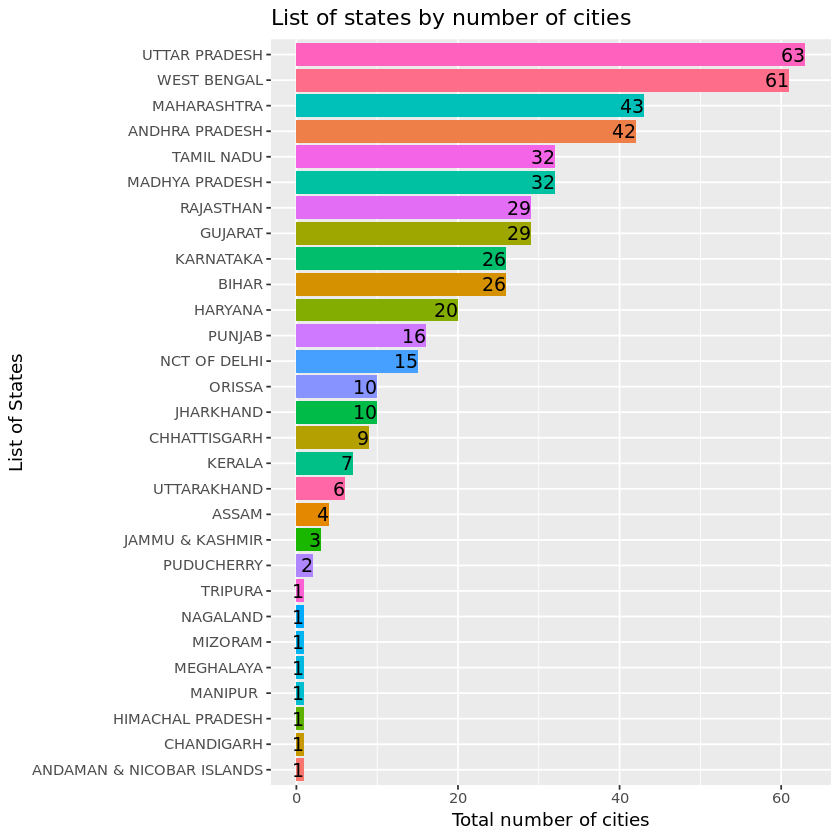

In [11]:
ggplot(data = states, aes(x=reorder(state_name, citiestotal), y = citiestotal)) +
  geom_bar(stat = "identity", aes(fill = state_name)) + guides(fill=F) +
  coord_flip() + xlab("List of States") + ylab("Total number of cities") + ggtitle("Number of cities choosed from each state") +
  geom_text(aes(label=citiestotal), hjust = 1.0, size = 4, position =  position_stack(vjust = 1.0))

In [15]:
state_df <- data %>% group_by(state_code, state_name) %>% summarise(cities = n(),
total_population = sum(population_total), 
male_population = sum(population_male),female_population = sum(population_female),
state_sex_ratio = round((female_population/male_population)*1000,0),
child_population = sum(X0.6_population_total),
male_child_population=sum(X0.6_population_male),female_child_population=sum(X0.6_population_female),
state_Child_sex_ratio = round((female_child_population/male_child_population)*1000,0),
total_literates = sum(literates_total),
male_literates = sum(literates_male),female_literates = sum(literates_female),
effective_literacy_rate = round((total_literates/total_population)*100,1),
male_effective_literacy_rate = round((male_literates/total_population)*100,1),female_effective_literacy_rate = round((female_literates/total_population)*100,1),
graduates_total = sum(total_graduates),
graduates_male = sum(male_graduates),graduates_female = sum(female_graduates),
total_graduation_rate = round((graduates_total/total_population)*100,2),
male_graduation_rate = round((graduates_male/male_population)*100,2),female_graduation_rate = round((graduates_female/female_population)*100,2)) %>% arrange(desc(total_population))

In [16]:
population_data <- melt(state_df[, c("state_name", "total_population", "male_population", "female_population")], id="state_name")

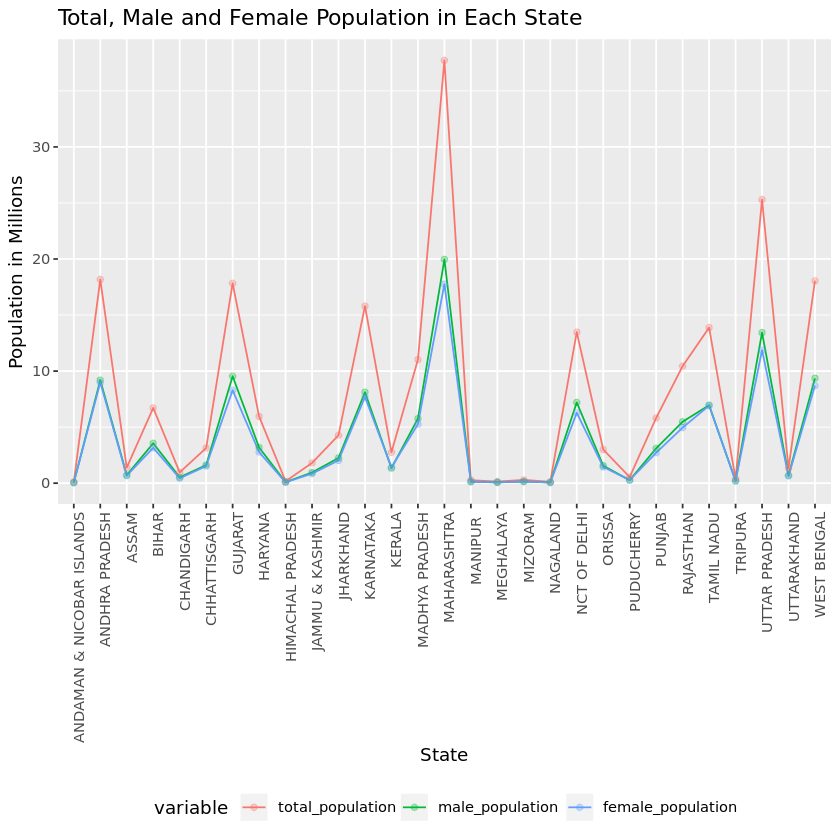

In [17]:
ggplot(population_data, aes(state_name, value/10^6, col=variable)) + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position="bottom") +
  geom_line(aes(group=variable)) + geom_point(alpha=0.3) +
  labs(x="State", y="Population in Millions", title="Total, Male and Female Population in Each State")

In [18]:
state_df$total_population <- 100*state_df$total_population/sum(state_df$total_population)
state_df$male_population <- 100*state_df$male_population/sum(state_df$male_population)
state_df$female_population <- 100*state_df$female_population/sum(state_df$female_population)
population_data <- melt(state_df[, c("state_name", "total_population", "male_population", "female_population")], id="state_name")

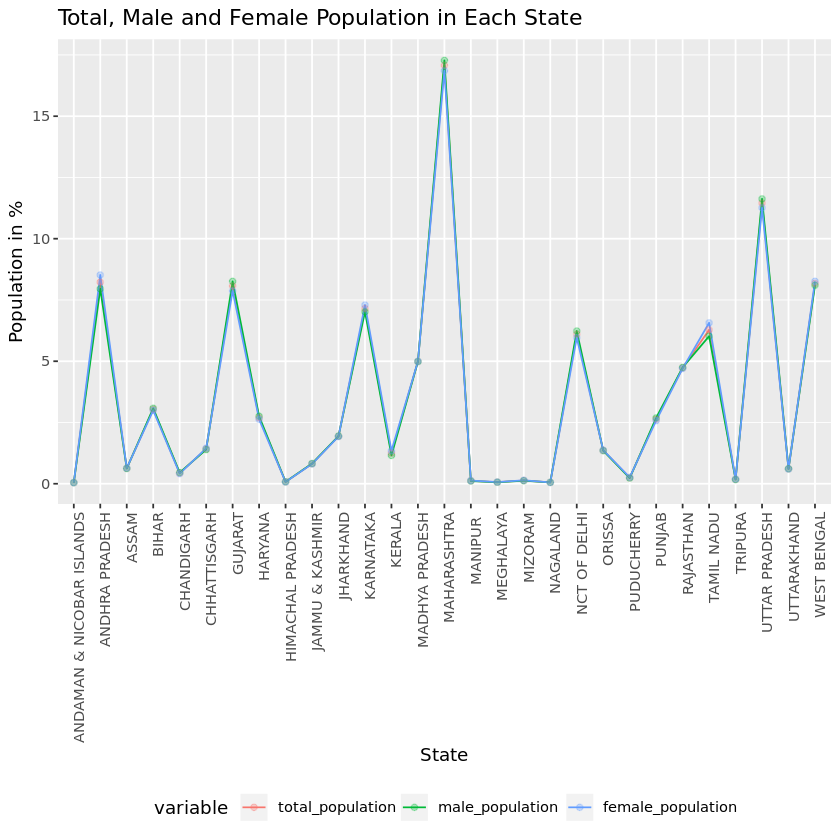

In [19]:
ggplot(population_data, aes(state_name, value, col=variable)) + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position="bottom") +
  geom_line(aes(group=variable)) + geom_point(alpha=0.3) +
  labs(x="State", y="Population in %", title="Total, Male and Female Population in Each State")

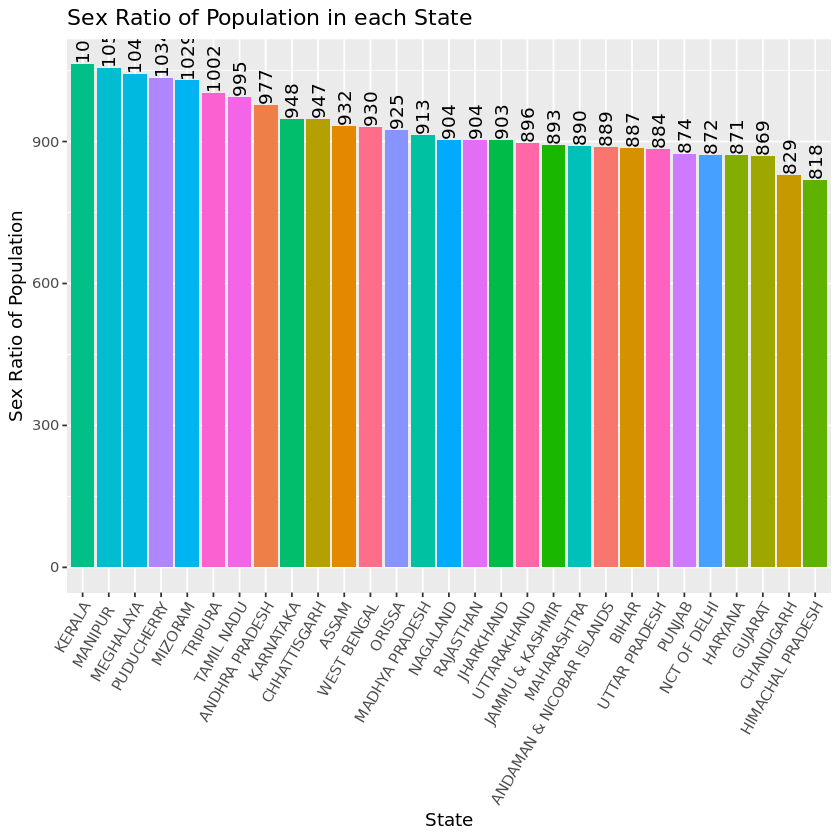

In [20]:
ggplot(state_df, aes(reorder(state_name, state_sex_ratio, desc), state_sex_ratio, fill=state_name)) + 
  theme(axis.text.x = element_text(angle = 60, hjust = 1), legend.position="none") + geom_bar(stat="identity") +
  geom_text(aes(label=state_sex_ratio), stat = "identity",hjust=0, angle=90) +
  labs(x="State", y="Sex Ratio of Population", title="Sex Ratio of Population in each State")

In [24]:
topp <- data %>% group_by(name_of_city) %>% summarise(tot=sum(population_total)) %>% arrange(desc(tot))

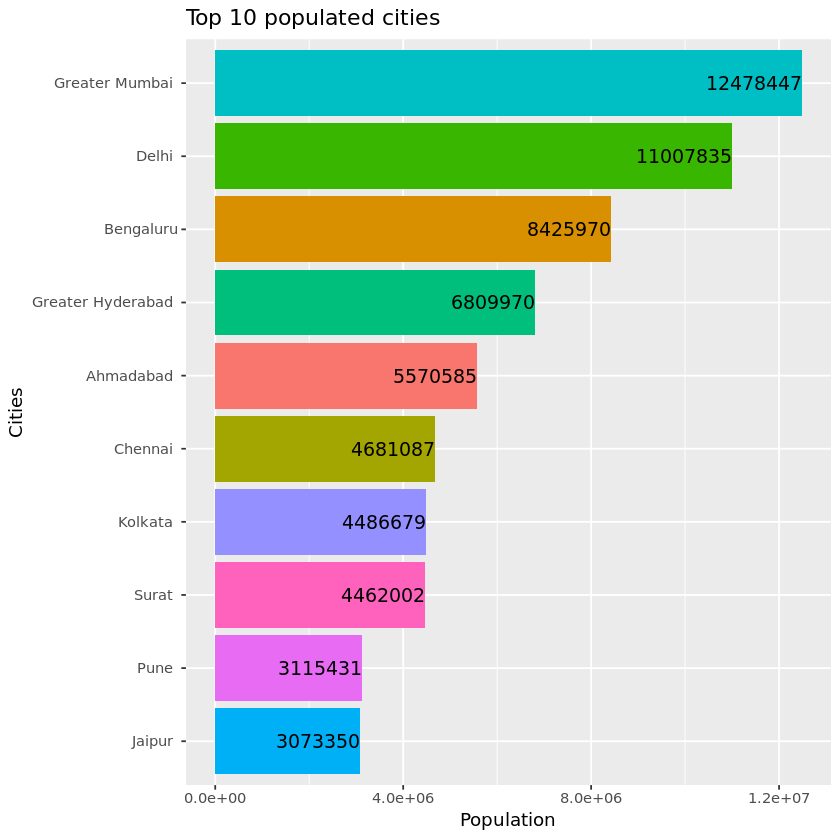

In [26]:
head(topp,10) %>% ggplot(aes(reorder(name_of_city,tot),tot,fill=name_of_city)) + geom_bar(stat = "identity") + xlab("Cities") +
    ylab("Population") + coord_flip() + xlab("Cities") + 
    ggtitle("Top 10 populated cities") + guides(fill=F) +
    geom_text(aes(label=tot), hjust = 1.0, size = 4, position = position_dodge(width = 1.0))

In [21]:
literacy_data <- melt(state_df[, c("state_name", "total_literates", "male_literates", "female_literates")], id="state_name")

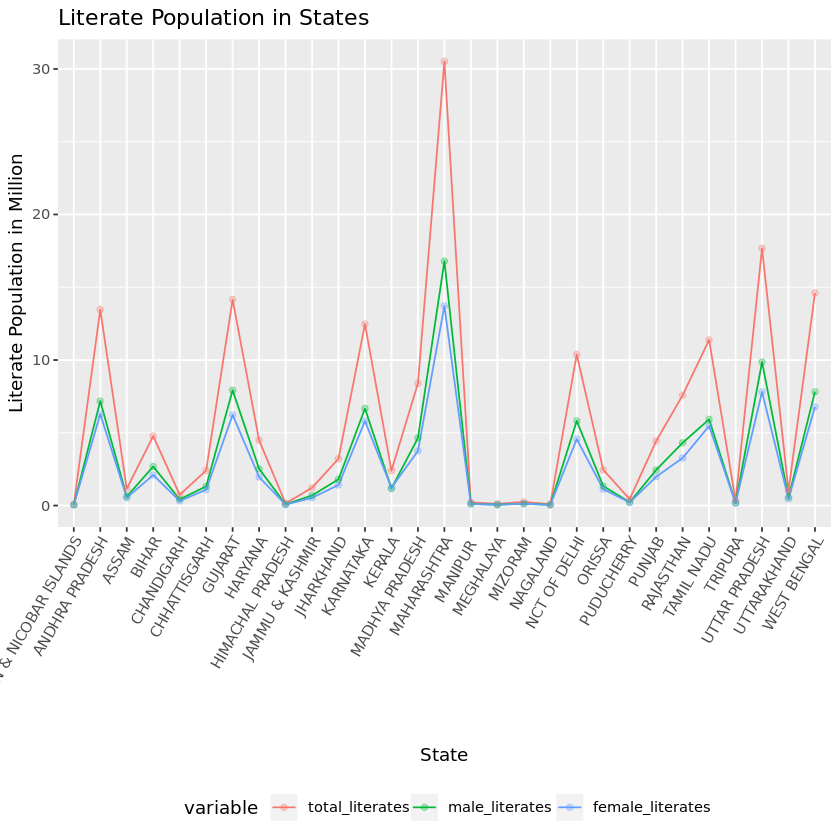

In [22]:
ggplot(literacy_data, aes(state_name, value/(10^6), col=variable)) + 
geom_line(aes(group=variable)) + geom_point(alpha=0.3) +
  theme(axis.text.x = element_text(angle = 60, hjust = 1), legend.position = "bottom") +
  labs(x="State", y="Literate Population in Million", title="Literate Population in States") 


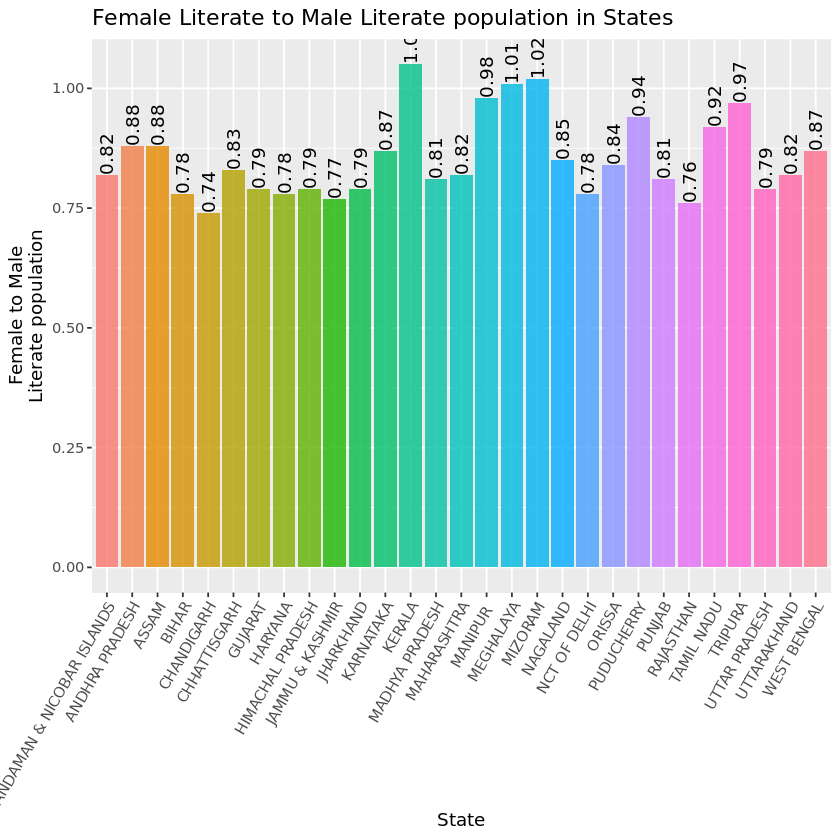

In [29]:
ggplot(state_df, aes(state_name, round((female_literates/male_literates),2), fill=state_name)) + geom_bar(stat = "identity", position = position_dodge(width = 0.5), alpha=0.8) +
  geom_text(label=round((state_df$female_literates/state_df$male_literates),2), angle=90, hjust=0) +
  theme(axis.text.x = element_text(angle = 60,hjust = 1), legend.position = "none") +
  labs(x="State", y="Female to Male\nLiterate population", title="Female Literate to Male Literate population in States")

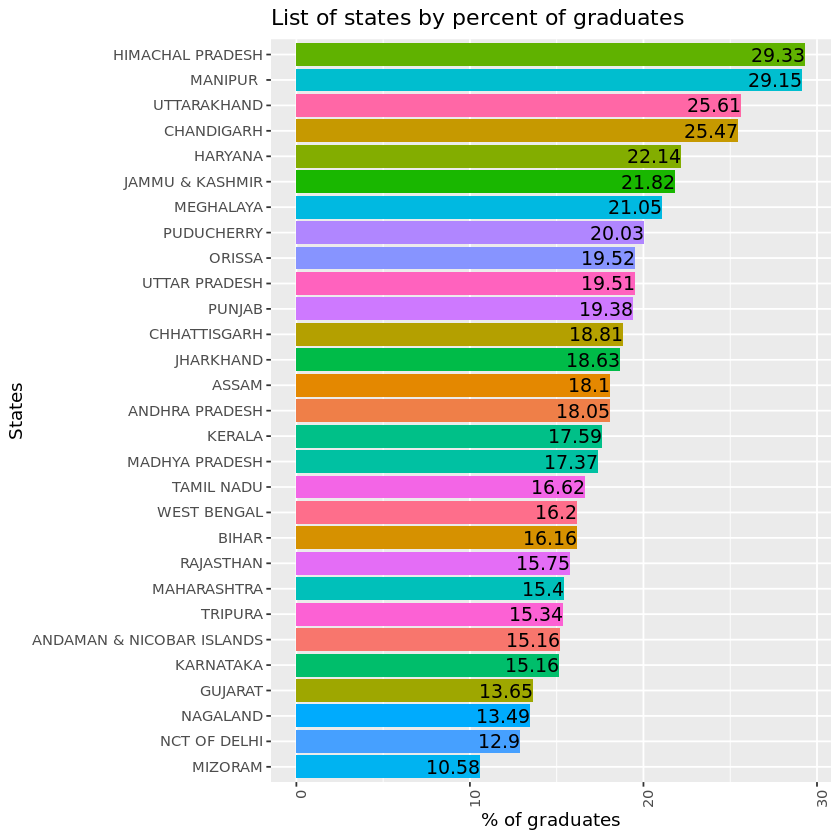

In [27]:
data$grad_rate<- (data$total_graduates/data$literates_total)*100

topp<- data %>% group_by(state_name) %>% summarise(tot = mean(grad_rate)) %>% arrange(desc(tot))

topp %>% ggplot(aes(reorder(state_name,tot),tot,fill=state_name)) + geom_bar(stat = "identity") + 
xlab("States") + ylab("% of graduates")+
theme(axis.text.x = element_text(angle = 90, hjust = 1)) + coord_flip() +
ggtitle("List of states by percent of graduates") + guides(fill=F) +
geom_text(aes(label=round(tot,2)), hjust = 1.0, size = 4, position = position_dodge(width = 1))

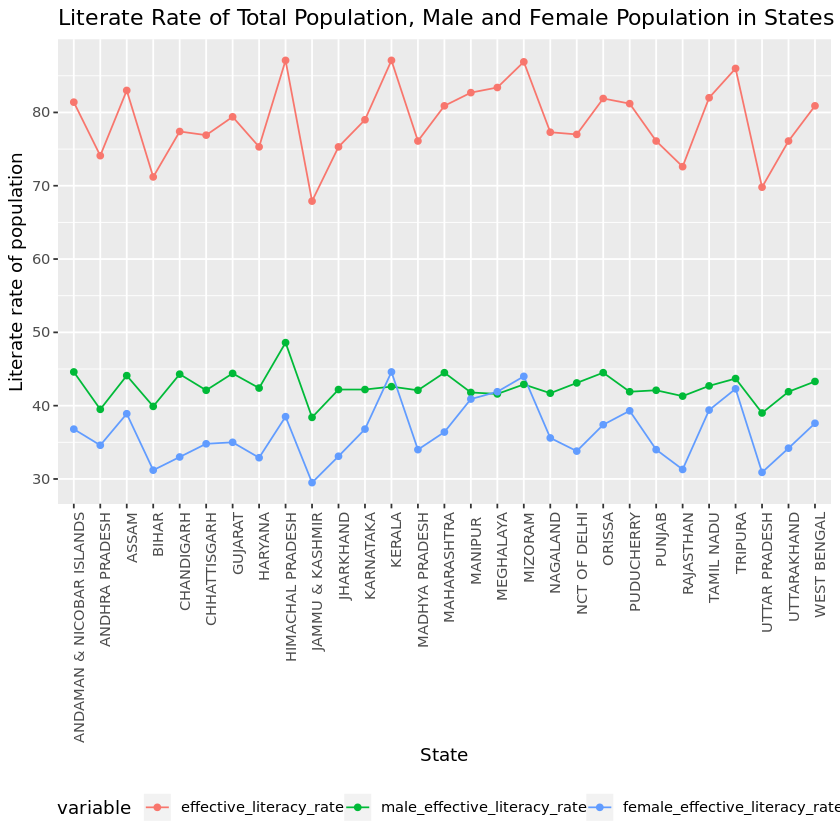

In [31]:
literacy_rate_data <- melt(state_df[, c("state_name", "effective_literacy_rate", "male_effective_literacy_rate", "female_effective_literacy_rate")], id="state_name")

ggplot(literacy_rate_data, aes(state_name, value, col=variable)) + geom_line(aes(group = variable)) + geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position = "bottom") +
  labs(x="State", y="Literate rate of population", title="Literate Rate of Total Population, Male and Female Population in States")

In [32]:
sex_ratio_vs_literacy_rate_data <- melt(state_df[, c("state_name", 
                                                     "state_sex_ratio",
                                                     "effective_literacy_rate", 
                                                     "male_effective_literacy_rate", 
                                                     "female_effective_literacy_rate")], 
                                        id="state_name")


In [33]:
sex_ratio_vs_literacy_rate_data[sex_ratio_vs_literacy_rate_data$variable=="state_sex_ratio",]$value <-
  sex_ratio_vs_literacy_rate_data[sex_ratio_vs_literacy_rate_data$variable=="state_sex_ratio",]$value/10

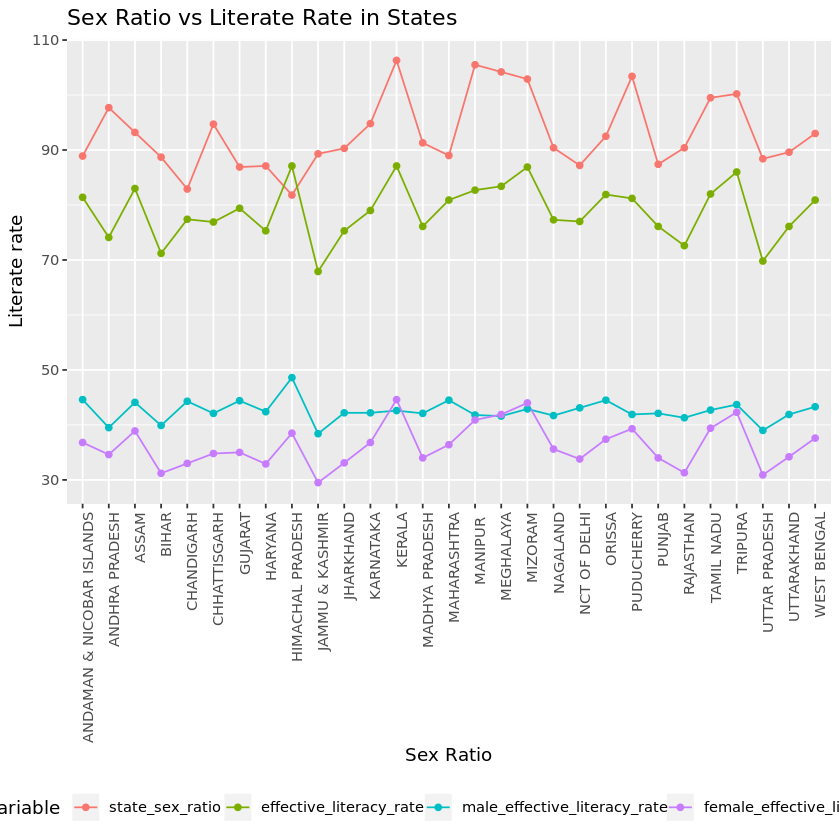

In [34]:
ggplot(sex_ratio_vs_literacy_rate_data, aes(state_name, value, col=variable)) + 
  geom_line(aes(group = variable)) + geom_point()  +
  theme(axis.text.x = element_text(angle = 90, hjust=1), legend.position = "bottom") +
  labs(x="Sex Ratio", y="Literate rate", title="Sex Ratio vs Literate Rate in States")

In [35]:
sex_ratio_vs_graduation_rate_data <- melt(state_df[, c("state_name", 
                                                     "state_sex_ratio",
                                                     "total_graduation_rate", 
                                                     "male_graduation_rate", 
                                                     "female_graduation_rate")], 
                                        id="state_name")

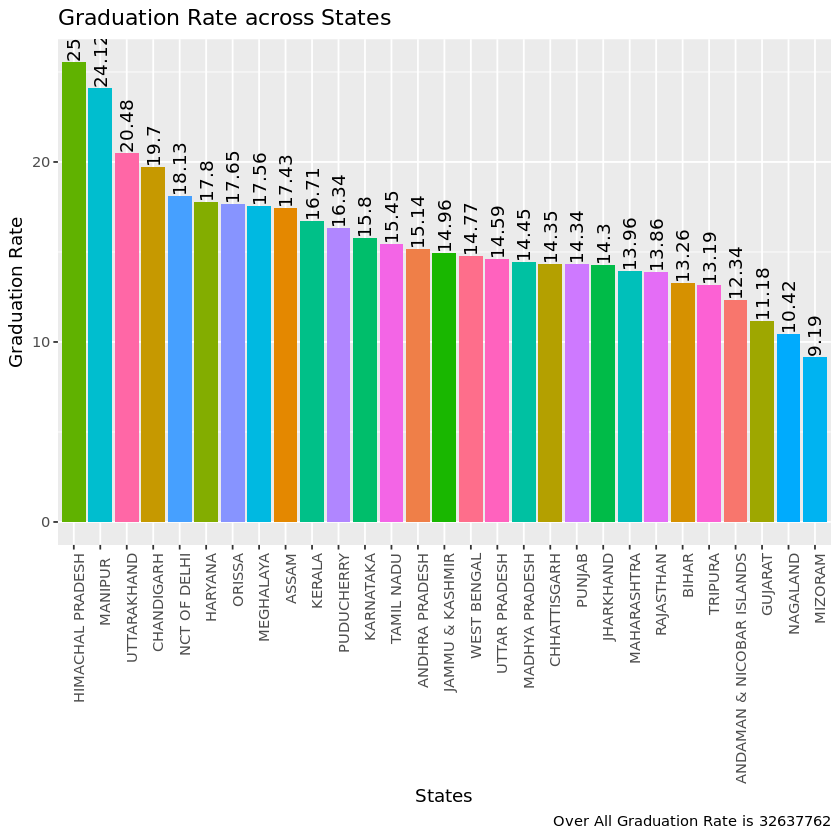

In [36]:
ggplot(sex_ratio_vs_graduation_rate_data[sex_ratio_vs_graduation_rate_data$variable=="total_graduation_rate",], 
       aes(reorder(state_name, value, desc), value, fill=state_name)) + geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle=90,hjust=1), legend.position = "none") + 
  geom_text(aes(label=value), angle=90, hjust=0) +
  labs(x= "States", y="Graduation Rate", title = "Graduation Rate across States", caption=paste("Over All Graduation Rate is", round((sum(state_df$graduates_total)/sum(state_df$total_population))*100,2)))


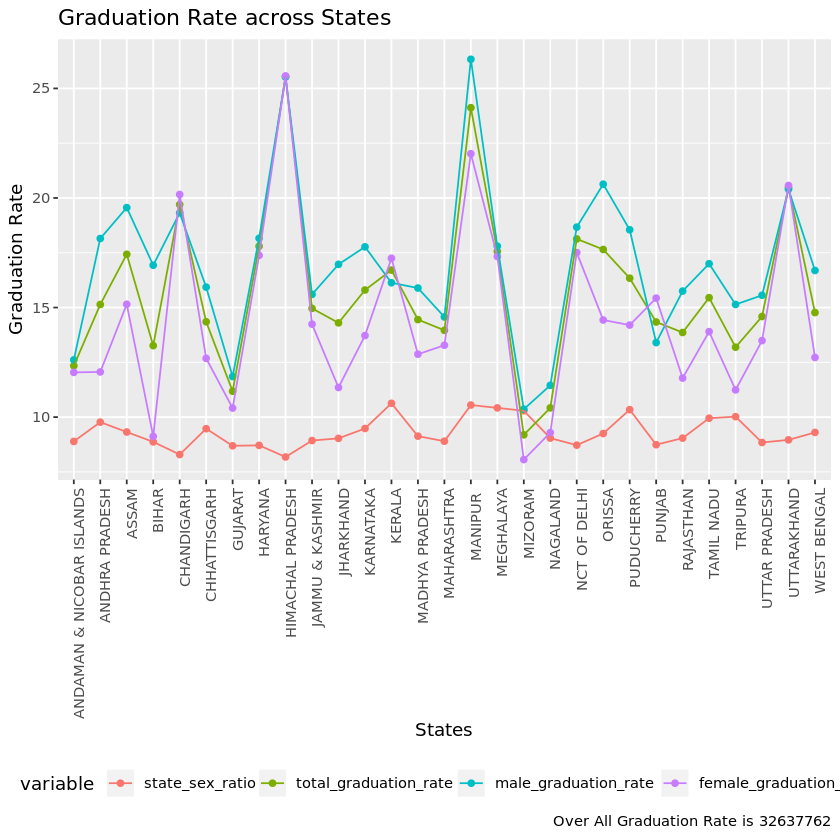

In [37]:
sex_ratio_vs_graduation_rate_data[sex_ratio_vs_graduation_rate_data$variable=="state_sex_ratio",]$value <-
  sex_ratio_vs_graduation_rate_data[sex_ratio_vs_graduation_rate_data$variable=="state_sex_ratio",]$value/100

ggplot(sex_ratio_vs_graduation_rate_data, aes(state_name, value, col=variable)) + geom_point() + 
geom_line(aes(group=variable)) + theme(axis.text.x = element_text(angle=90,hjust=1), legend.position = "bottom") + 
  labs(x= "States", y="Graduation Rate", title = "Graduation Rate across States", 
       caption=paste("Over All Graduation Rate is", 
                     round((sum(state_df$graduates_total)/sum(state_df$total_population))*100,2)))

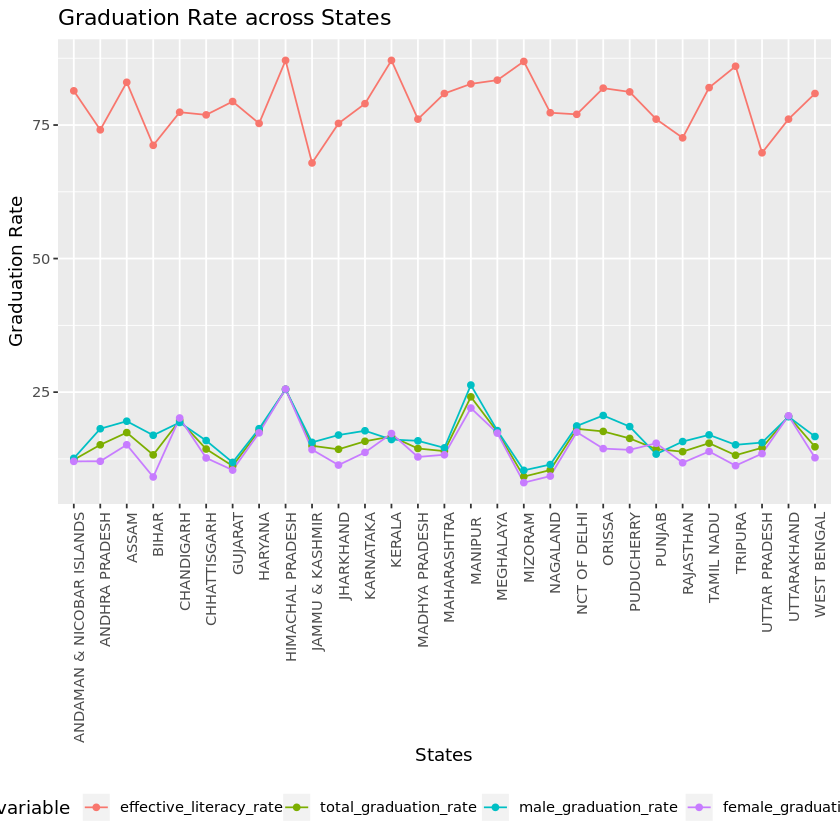

In [38]:
literacy_rate_vs_graduation_rate_data <- melt(state_df[, c("state_name", 
                                                       "effective_literacy_rate",
                                                       "total_graduation_rate", 
                                                       "male_graduation_rate", 
                                                       "female_graduation_rate")], 
                                          id="state_name")

ggplot(literacy_rate_vs_graduation_rate_data, aes(state_name, value, col=variable)) + 
geom_line(aes(group=variable)) + geom_point() + 
theme(axis.text.x = element_text(angle=90,hjust=1), legend.position = "bottom") + 
  labs(x= "States", y="Graduation Rate", title = "Graduation Rate across States")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


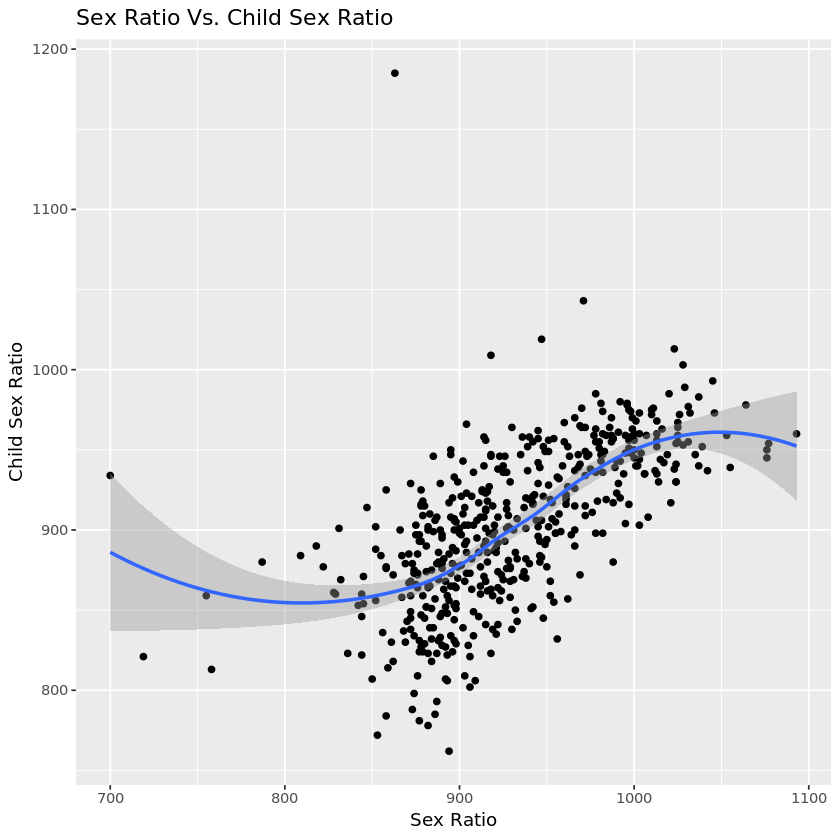

In [40]:
ggplot(data, aes(sex_ratio, child_sex_ratio)) + geom_point() + geom_smooth() +
   labs(x="Sex Ratio", y="Child Sex Ratio", title="Sex Ratio Vs. Child Sex Ratio")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


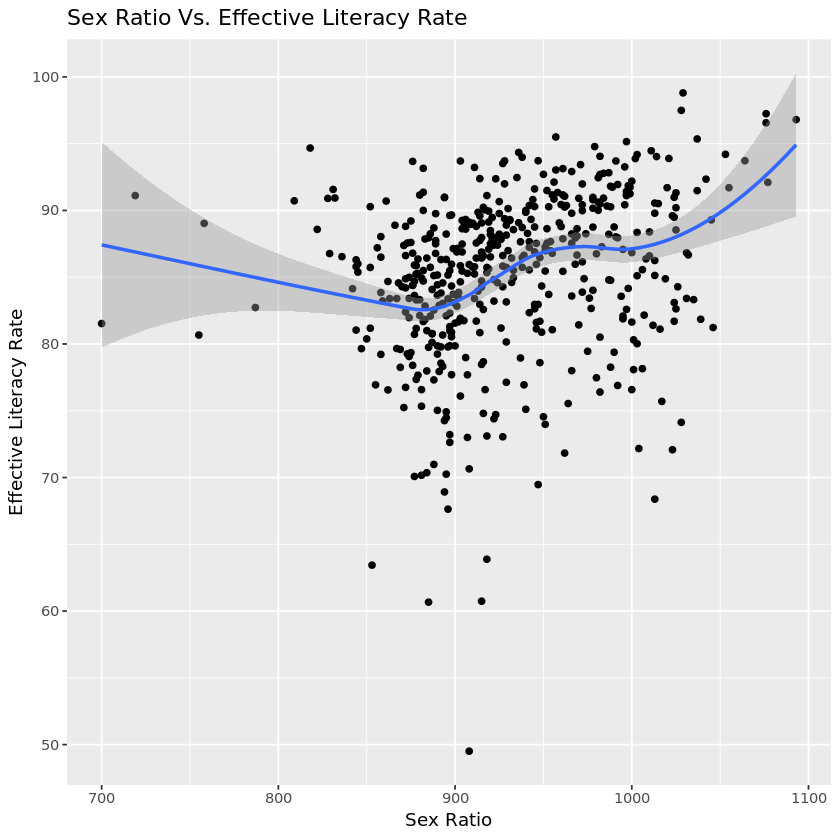

In [41]:
ggplot(data, aes(sex_ratio, effective_literacy_rate_total)) + geom_point() + geom_smooth() +
   labs(x="Sex Ratio", y="Effective Literacy Rate", title="Sex Ratio Vs. Effective Literacy Rate")


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


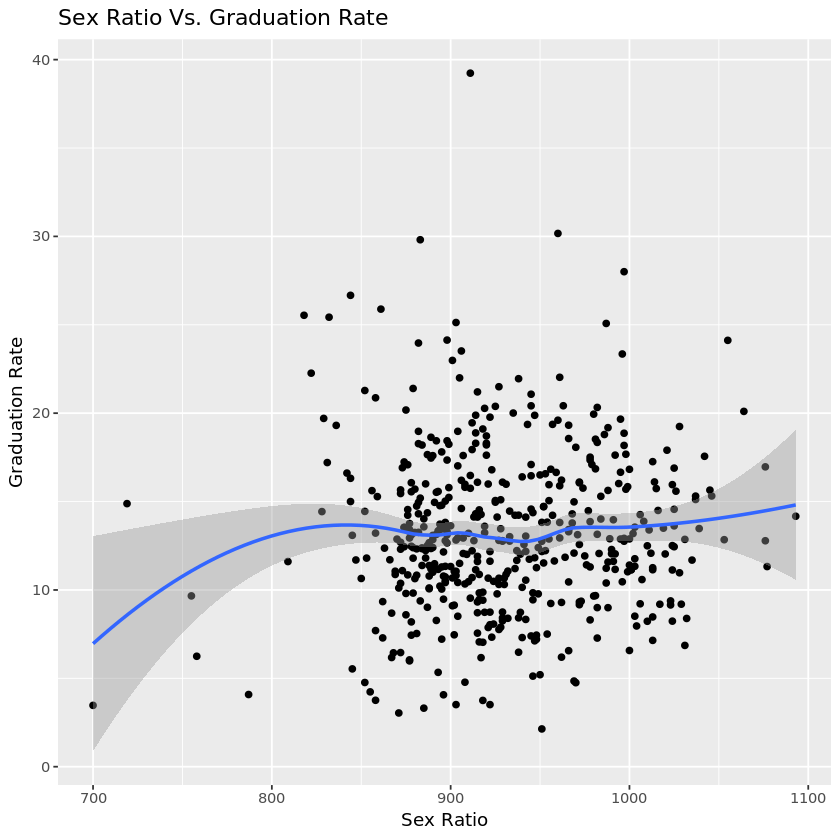

In [42]:
ggplot(data, aes(sex_ratio, total_graduates*100/population_total)) + geom_point() + geom_smooth() +
  labs(x="Sex Ratio", y="Graduation Rate", title="Sex Ratio Vs. Graduation Rate")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


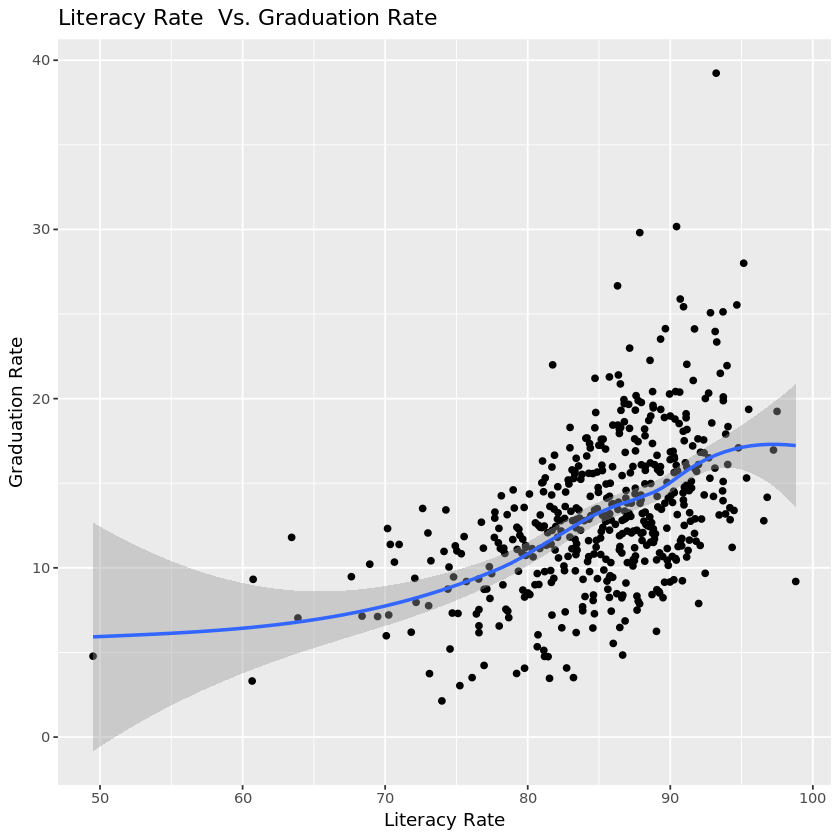

In [43]:
ggplot(data, aes(effective_literacy_rate_total, total_graduates*100/population_total)) + geom_point() + geom_smooth() +
  labs(x="Literacy Rate", y="Graduation Rate", title="Literacy Rate  Vs. Graduation Rate")